# ECON 220 - Data Science for Economists
## Week 8 - More on probability distributions
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

## Step 2. Examining the **uniform distribution**

Why set a seed?
- A seed initializes the pseudo‑random number generator. Using the same seed produces the same sequence of “random” numbers every run, which is essential for reproducibility, debugging, and sharing results in notebooks.

In [ ]:
# Generate vector of 5 random numbers from uniform(0, 1)
np.random.seed(2025) # Set same seed to get similar result
u1 = stats.uniform.rvs(size=5)
u1

array([0.29280939, 0.61091433, 0.91302739, 0.300115  , 0.24859864])

In [17]:
# Generate vector of 100,000 random numbers between a=10 and b=100: 
# Use: stats.uniform.rvs(size, a, b-a)
np.random.seed(123) # Seed in effect for one cell
u2 = stats.uniform.rvs(size=100000, loc=10, scale=100-10)
u2

array([72.6822267 , 35.75254015, 30.41663082, ..., 88.097556  ,
       60.96019593, 65.16046407])

[Text(0.5, 1.0, 'Histogram of random uniform numbers'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Frequency')]

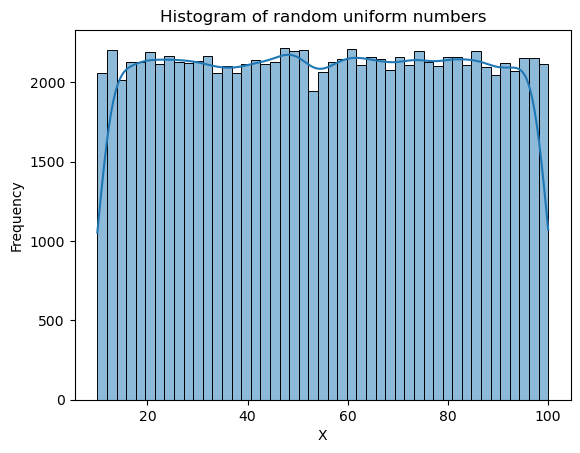

In [18]:
# Visualize the uniform distribution with seaborn
hist_unif = sns.histplot(u2, kde=True)
hist_unif.set(title="Histogram of random uniform numbers", xlabel="X", ylabel="Frequency")

### Computing probabilities using the uniform distribution

In [19]:
# Probability of P(X<x): stats.uniform.cdf(x, a, b-a)
# Find P(X<3) on uniform(1, 20)
stats.uniform.cdf(3, 1, 20-1)

0.10526315789473684

In [20]:
# Practice:
# Find P(X>4) on uniform(2, 12)
1 - stats.uniform.cdf(4, 2, 12-2)


0.8

## Step 3. Examining the **normal distribution**

In [31]:
# Generate 100,000 random numbers from Norm(50, 10^2)
np.random.seed(578)
n1 = stats.norm.rvs(size=100000, loc=50, scale=10)
n1

array([46.38190268, 56.01681305, 42.68337069, ..., 48.84427816,
       42.8974724 , 67.90048878])

[Text(0.5, 1.0, 'Histogram of random draws from the normal distribution'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Frequency')]

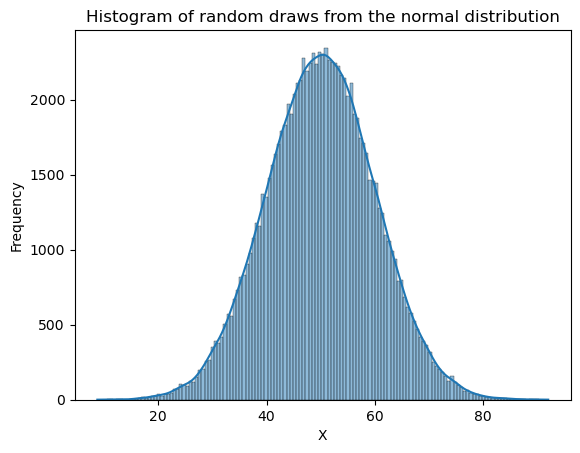

In [32]:
# Visualize the uniform distribution with seaborn
hist_norm = sns.histplot(n1, kde=True)
hist_norm.set(title="Histogram of random draws from the normal distribution", xlabel="X", ylabel="Frequency")

Compute mean and standard deviation of generated numbers

In [33]:
sim_mean = np.mean(n1)
sim_std  = np.std(n1)
sim_mean, sim_std

(50.030901500106424, 10.00824923159582)

### Computing probabilities using the normal distribution

In [34]:
# Find P(X<20) for Norm(22, 5)
stats.norm.cdf(20, 22, 5**0.5)

0.18554668476134878

In [35]:
# Find P(17.2<X<28.5) for Norm(18,6)
stats.norm.cdf(28.5, 18, 6**0.5) - stats.norm.cdf(17.2, 18, 6**0.5)

0.6280051898226899

In [36]:
# Find P(X<15) or P(X>25) for Norm(20,3)
stats.norm.cdf(15, 20, 3**0.5) + (1 - stats.norm.cdf(25, 20, 3**0.5))

0.0038924171227785872

## Step 4. Examining the **binomial distribution**

In [ ]:
np.random.seed(123)
b1 = stats.binom.rvs(n=10, p=0.3, size=20)
b1

Interesting result: If np >= 10 and n(1-p) >= 10, then the binomial distribution can be approximated by a normal distribution with mean np and variance np(1-p).

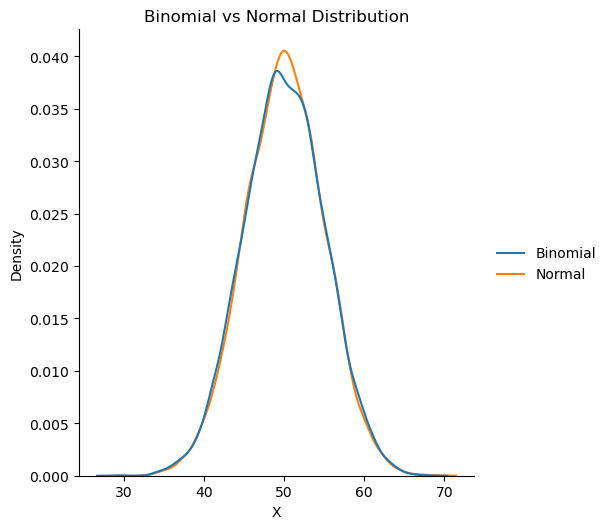

In [37]:
p = 0.5
n = 100
sc = (n*p*(1-p))**0.5
data_binom = stats.binom.rvs(size=10000, n=n, p=p)
data_norm  = stats.norm.rvs(size=10000, loc=n*p, scale=sc)


data = pd.DataFrame({'Binomial':data_binom, 'Normal':data_norm})
plot_approx = sns.displot(data, kind='kde')
plot_approx.set(title="Binomial vs Normal Distribution", xlabel="X", ylabel="Density")

In [ ]:
!jupyter nbconvert --to html "Week 8. Probability Distributions.ipynb"